In [1]:
!pip install rtree -q
!pip install pygeos -q
!pip install osmnx
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
import pandas as pd

In [3]:
comunas=gpd.read_file('comunas_valparaiso.shp')
comunas.head()

,objectid,dis_elec,cod_comuna,codregion,Region,Comuna,Provincia,geometry
0,169,6,5303,5,Región de Valparaíso,Rinconada,Los Andes,"POLYGON ((-70.71035 -32.80030, -70.71074 -32.8..."
1,171,6,5402,5,Región de Valparaíso,Cabildo,Petorca,"POLYGON ((-70.45137 -32.22427, -70.45100 -32.2..."
2,174,6,5404,5,Región de Valparaíso,Petorca,Petorca,"POLYGON ((-70.72995 -32.02670, -70.72862 -32.0..."
3,191,6,5704,5,Región de Valparaíso,Panquehue,San Felipe,"POLYGON ((-70.74171 -32.75451, -70.74171 -32.7..."
4,181,6,5803,5,Región de Valparaíso,Olmué,Marga Marga,"POLYGON ((-71.11841 -32.95558, -71.11783 -32.9..."


In [4]:
incendios=gpd.read_file('incendios_forestales_2017.shp')
incendios.head()

,id,temporada,codreg,codprov,codcom,ambito,numero,nombre_inc,utm_este,utm_norte,...,total_plan,arbolado,matorral,pastizal,total_veg,agricola,desechos,total_otra,sup_t_a,geometry
0,1.0,2016-2017,3,33,3301,Conaf,2.0,CALLEJÓN MARTINEZ,326931.0,6838495.0,...,0.00,0.0,0.20,0.00,0.20,0.0,0.0,0.0,0.20,MULTIPOINT (326931.000 6838495.000)
1,2.0,2016-2017,3,33,3301,Conaf,3.0,PERALES,322031.0,6840235.0,...,0.00,0.0,0.10,0.00,0.10,0.0,0.0,0.0,0.10,MULTIPOINT (322031.000 6840235.000)
2,3.0,2016-2017,3,33,3301,Conaf,4.0,TORINO,329713.0,6836541.0,...,0.22,0.0,0.05,0.00,0.05,0.0,0.0,0.0,0.27,MULTIPOINT (329713.000 6836541.000)
3,4.0,2016-2017,3,33,3301,Conaf,5.0,LA VERBENA,335543.0,6829112.0,...,0.00,0.0,0.00,0.18,0.18,0.0,0.0,0.0,0.18,MULTIPOINT (335543.000 6829112.000)
4,5.0,2016-2017,3,33,3304,Conaf,6.0,PLAYA GRANDE HUASCO,283796.0,6849977.0,...,0.00,0.0,4.35,0.00,4.35,0.0,0.0,0.0,4.35,MULTIPOINT (283796.000 6849977.000)


In [5]:
valpo=incendios['codreg']==5
Valpo=incendios[valpo]
Valpo.dtypes

id             float64
temporada       object
codreg           int64
codprov          int64
codcom           int64
ambito          object
numero         float64
nombre_inc      object
utm_este       float64
utm_norte      float64
inicio_c        object
combus_i        object
causa_gene      object
causa_espe      object
pino_0010      float64
pino_11_17     float64
pino_18        float64
eucalipto      float64
otras_plan     float64
total_plan     float64
arbolado       float64
matorral       float64
pastizal       float64
total_veg      float64
agricola       float64
desechos       float64
total_otra     float64
sup_t_a        float64
geometry      geometry
dtype: object

In [6]:
espe=pd.read_csv('causas_especificas_incendios.csv',sep=';')
gene=pd.read_csv('causas_generales_incendios.csv', sep=';',dtype = {'CODIGO': str})
gene.dtypes

CODIGO    object
NOMBRE    object
dtype: object

In [7]:
espe['CODIGO']=espe['CODIGO'].astype('object')
gene

,CODIGO,NOMBRE
0,1.1,FAENAS FORESTALES
1,1.2,FAENAS AGRÍCOLAS Y PECUARIAS
2,1.3,CONFECCIÓN Y/O EXTRACCIÓN PRODUCTOS SECUNDARIO...
3,1.4,ACTIVIDADES RECREATIVAS
4,1.5,OPERACIONES EN VÍAS FÉRREAS
5,1.6,"ACTIVIDADES EXTINCIÓN INCENDIOS FORESTALES , I..."
6,1.7,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
7,1.8,QUEMA DE DESECHOS
8,1.9,ACCIDENTES ELÉCTRICOS
9,1.10,OTRAS ACTIVIDADES


In [8]:
espe['CODIGO1']=espe.CODIGO.apply(lambda x: x + '.')
espe

,CODIGO,NOMBRE,CODIGO1
0,1.1.1,QUEMA LEGAL DE DESECHOS DE COSECHA FORESTAL (Q...,1.1.1.
1,1.1.2,QUEMA ILEGAL DE DESECHOS DE COSECHA FORESTAL (...,1.1.2.
2,1.1.3,REBROTE DE QUEMA LEGAL DE COSECHA FORESTAL,1.1.3.
3,1.1.4,REBROTE DE QUEMA ILEGAL DE COSECHA FORESTAL,1.1.4.
4,1.1.5,QUEMA LEGAL DE HABILITACIÓN DE TERRENO FORESTA...,1.1.5.
...,...,...,...
90,3.1.1,CAÍDA DE RAYO,3.1.1.
91,3.1.2,ERUPCIÓN VOLCÁNICA,3.1.2.
92,3.1.3,OTRAS CAUSAS NATURALES NO CLASIFICADAS,3.1.3.
93,4.1.1,DESCONOCIDA (SE INVESTIGA PERO NO ES POSIBLE E...,4.1.1.


In [9]:
Valpo1=Valpo.join(espe.set_index('CODIGO1'), on='causa_espe')
Valpo1

,id,temporada,codreg,codprov,codcom,ambito,numero,nombre_inc,utm_este,utm_norte,...,matorral,pastizal,total_veg,agricola,desechos,total_otra,sup_t_a,geometry,CODIGO,NOMBRE
115,116.0,2016-2017,5,55,5501,Conaf,1.0,PARQUE ACONCAGUA,288662.0,6360432.0,...,0.00,0.03,0.03,0.0,0.00,0.00,0.03,MULTIPOINT (288662.000 6360432.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
116,117.0,2016-2017,5,58,5803,Conaf,2.0,LA RAMAYANA,309341.0,6338636.0,...,5.59,2.27,8.45,0.0,0.00,0.00,8.45,MULTIPOINT (309341.000 6338636.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
117,118.0,2016-2017,5,51,5101,Conaf,3.0,LAS CENIZAS PUERTA 5,261580.0,6333891.0,...,0.00,0.05,0.05,0.0,0.00,0.00,0.10,MULTIPOINT (261580.000 6333891.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
118,119.0,2016-2017,5,51,5101,Conaf,4.0,BORDE DE LAGUNA CURAUMA,259840.0,6329748.0,...,0.00,0.07,0.07,0.0,0.03,0.03,0.10,MULTIPOINT (259840.000 6329748.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
119,120.0,2016-2017,5,56,5605,Conaf,5.0,PANGUE ALTO CHEPICA,254439.0,6296226.0,...,0.00,0.08,0.08,0.0,0.02,0.02,0.10,MULTIPOINT (254439.000 6296226.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1041.0,2016-2017,5,54,5405,Conaf,926.0,CURVA LOS MAOS,275928.0,6393097.0,...,0.96,0.17,1.13,0.0,0.00,0.00,1.13,MULTIPOINT (275928.000 6393097.000),1.2.2,QUEMA ILEGAL DE DESECHOS AGRÍCOLAS
1040,1042.0,2016-2017,5,55,5501,Conaf,927.0,CAJON SAN PEDRO,300226.0,6350534.0,...,0.06,0.04,0.10,0.0,0.00,0.00,0.10,MULTIPOINT (300226.000 6350534.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
1041,1043.0,2016-2017,5,58,5801,Conaf,928.0,LOS ARRAYANES-COLLIGUAY,308073.0,6323974.0,...,0.20,0.60,0.80,0.0,0.00,0.00,0.80,MULTIPOINT (308073.000 6323974.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
1042,1044.0,2016-2017,5,56,5602,Conaf,929.0,VALLE HERMOSO,265048.0,6300991.0,...,0.00,0.00,0.00,0.0,0.01,0.01,0.01,MULTIPOINT (265048.000 6300991.000),1.2.4,QUEMA ILEGAL CON OTROS FINES AGRÍCOLA (QUEMA S...


In [10]:
Valpo1.causa_gene = Valpo1.causa_gene.replace({"01.01": "1.1", "01.02": "1.2","01.03":"1.3","01.04": "1.4","01.05": "1.5","01.06": "1.6","01.07": "1.7","01.08": "1.8","01.09": "1.9","01.10": "1.10","02.01": "2.1","03.01": "3.1","04.01": "4.1"})

In [11]:
Valpo1=Valpo1.rename(columns={'CODIGO':'CODIGO_espe','NOMBRE':'NOMBRE_espe'})
Valpo1

,id,temporada,codreg,codprov,codcom,ambito,numero,nombre_inc,utm_este,utm_norte,...,matorral,pastizal,total_veg,agricola,desechos,total_otra,sup_t_a,geometry,CODIGO_espe,NOMBRE_espe
115,116.0,2016-2017,5,55,5501,Conaf,1.0,PARQUE ACONCAGUA,288662.0,6360432.0,...,0.00,0.03,0.03,0.0,0.00,0.00,0.03,MULTIPOINT (288662.000 6360432.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
116,117.0,2016-2017,5,58,5803,Conaf,2.0,LA RAMAYANA,309341.0,6338636.0,...,5.59,2.27,8.45,0.0,0.00,0.00,8.45,MULTIPOINT (309341.000 6338636.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
117,118.0,2016-2017,5,51,5101,Conaf,3.0,LAS CENIZAS PUERTA 5,261580.0,6333891.0,...,0.00,0.05,0.05,0.0,0.00,0.00,0.10,MULTIPOINT (261580.000 6333891.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
118,119.0,2016-2017,5,51,5101,Conaf,4.0,BORDE DE LAGUNA CURAUMA,259840.0,6329748.0,...,0.00,0.07,0.07,0.0,0.03,0.03,0.10,MULTIPOINT (259840.000 6329748.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
119,120.0,2016-2017,5,56,5605,Conaf,5.0,PANGUE ALTO CHEPICA,254439.0,6296226.0,...,0.00,0.08,0.08,0.0,0.02,0.02,0.10,MULTIPOINT (254439.000 6296226.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1041.0,2016-2017,5,54,5405,Conaf,926.0,CURVA LOS MAOS,275928.0,6393097.0,...,0.96,0.17,1.13,0.0,0.00,0.00,1.13,MULTIPOINT (275928.000 6393097.000),1.2.2,QUEMA ILEGAL DE DESECHOS AGRÍCOLAS
1040,1042.0,2016-2017,5,55,5501,Conaf,927.0,CAJON SAN PEDRO,300226.0,6350534.0,...,0.06,0.04,0.10,0.0,0.00,0.00,0.10,MULTIPOINT (300226.000 6350534.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
1041,1043.0,2016-2017,5,58,5801,Conaf,928.0,LOS ARRAYANES-COLLIGUAY,308073.0,6323974.0,...,0.20,0.60,0.80,0.0,0.00,0.00,0.80,MULTIPOINT (308073.000 6323974.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES
1042,1044.0,2016-2017,5,56,5602,Conaf,929.0,VALLE HERMOSO,265048.0,6300991.0,...,0.00,0.00,0.00,0.0,0.01,0.01,0.01,MULTIPOINT (265048.000 6300991.000),1.2.4,QUEMA ILEGAL CON OTROS FINES AGRÍCOLA (QUEMA S...


In [12]:
Valpo2=Valpo1.join(gene.set_index('CODIGO'), on='causa_gene')

In [13]:
Valpo2=Valpo2.rename(columns={'NOMBRE':'NOMBRE_gene'})
Valpo2

,id,temporada,codreg,codprov,codcom,ambito,numero,nombre_inc,utm_este,utm_norte,...,pastizal,total_veg,agricola,desechos,total_otra,sup_t_a,geometry,CODIGO_espe,NOMBRE_espe,NOMBRE_gene
115,116.0,2016-2017,5,55,5501,Conaf,1.0,PARQUE ACONCAGUA,288662.0,6360432.0,...,0.03,0.03,0.0,0.00,0.00,0.03,MULTIPOINT (288662.000 6360432.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
116,117.0,2016-2017,5,58,5803,Conaf,2.0,LA RAMAYANA,309341.0,6338636.0,...,2.27,8.45,0.0,0.00,0.00,8.45,MULTIPOINT (309341.000 6338636.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
117,118.0,2016-2017,5,51,5101,Conaf,3.0,LAS CENIZAS PUERTA 5,261580.0,6333891.0,...,0.05,0.05,0.0,0.00,0.00,0.10,MULTIPOINT (261580.000 6333891.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
118,119.0,2016-2017,5,51,5101,Conaf,4.0,BORDE DE LAGUNA CURAUMA,259840.0,6329748.0,...,0.07,0.07,0.0,0.03,0.03,0.10,MULTIPOINT (259840.000 6329748.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
119,120.0,2016-2017,5,56,5605,Conaf,5.0,PANGUE ALTO CHEPICA,254439.0,6296226.0,...,0.08,0.08,0.0,0.02,0.02,0.10,MULTIPOINT (254439.000 6296226.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1041.0,2016-2017,5,54,5405,Conaf,926.0,CURVA LOS MAOS,275928.0,6393097.0,...,0.17,1.13,0.0,0.00,0.00,1.13,MULTIPOINT (275928.000 6393097.000),1.2.2,QUEMA ILEGAL DE DESECHOS AGRÍCOLAS,FAENAS AGRÍCOLAS Y PECUARIAS
1040,1042.0,2016-2017,5,55,5501,Conaf,927.0,CAJON SAN PEDRO,300226.0,6350534.0,...,0.04,0.10,0.0,0.00,0.00,0.10,MULTIPOINT (300226.000 6350534.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
1041,1043.0,2016-2017,5,58,5801,Conaf,928.0,LOS ARRAYANES-COLLIGUAY,308073.0,6323974.0,...,0.60,0.80,0.0,0.00,0.00,0.80,MULTIPOINT (308073.000 6323974.000),1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
1042,1044.0,2016-2017,5,56,5602,Conaf,929.0,VALLE HERMOSO,265048.0,6300991.0,...,0.00,0.00,0.0,0.01,0.01,0.01,MULTIPOINT (265048.000 6300991.000),1.2.4,QUEMA ILEGAL CON OTROS FINES AGRÍCOLA (QUEMA S...,FAENAS AGRÍCOLAS Y PECUARIAS


*Valpo2* corresponde al df con las causas generales y 
específicas añadidas.

Ahora a continuación se muestra en el mapa los puntos de foco de incendio sobre las comunas.

In [14]:
comunas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
comunas_utm=comunas.to_crs(32719)

<AxesSubplot:>

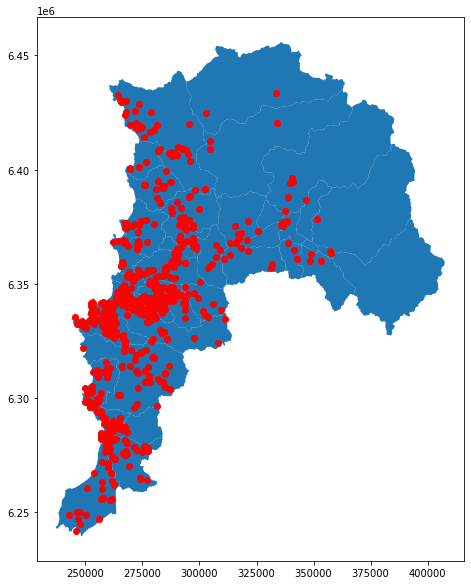

In [16]:
ax=comunas_utm.plot(figsize=(10,10))
Valpo.plot(ax=ax,figsize=(10,10),color='red')

In [17]:
repetidos=Valpo2.nombre_inc.value_counts()

In [18]:
df_repetidos = pd.DataFrame(repetidos)
df_repetidos

,nombre_inc
VISTA HERMOSA,7
ALTAR PAPAL,6
POTRERO LAS VACAS,6
LO ABARCA,6
LOS PARRONES,6
...,...
RINCONADA DE CABILDO,1
FINAL VALENTIN LETELIER,1
COPIHUE ROJO,1
CALLE LARGA - POCURO,1


In [19]:
df_repetidos = df_repetidos.reset_index()
df_repetidos

,index,nombre_inc
0,VISTA HERMOSA,7
1,ALTAR PAPAL,6
2,POTRERO LAS VACAS,6
3,LO ABARCA,6
4,LOS PARRONES,6
...,...,...
724,RINCONADA DE CABILDO,1
725,FINAL VALENTIN LETELIER,1
726,COPIHUE ROJO,1
727,CALLE LARGA - POCURO,1


In [20]:
df_repetidos.columns = ['nombre_inc', 'repeticion']

In [21]:
df_repetidos

,nombre_inc,repeticion
0,VISTA HERMOSA,7
1,ALTAR PAPAL,6
2,POTRERO LAS VACAS,6
3,LO ABARCA,6
4,LOS PARRONES,6
...,...,...
724,RINCONADA DE CABILDO,1
725,FINAL VALENTIN LETELIER,1
726,COPIHUE ROJO,1
727,CALLE LARGA - POCURO,1


In [22]:
kk=Valpo2.dissolve(by='nombre_inc')
kk

,geometry,id,temporada,codreg,codprov,codcom,ambito,numero,utm_este,utm_norte,...,matorral,pastizal,total_veg,agricola,desechos,total_otra,sup_t_a,CODIGO_espe,NOMBRE_espe,NOMBRE_gene
nombre_inc,,,,,,,,,,,,,,,,,,,,,
4TO SECTOR - PLAYA ANCHA,POINT (252465.000 6340416.000),309.0,2016-2017,5,51,5101,Conaf,194.0,252465.0,6340416.0,...,0.00,0.04,0.04,0.0,0.0,0.0,0.04,1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
ACHUPALLAS,POINT (266452.000 6344149.000),611.0,2016-2017,5,51,5109,Conaf,496.0,266452.0,6344149.0,...,0.00,0.01,0.01,0.0,0.0,0.0,0.01,1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
AERODROMO LA LIGUA,POINT (287936.000 6407899.000),822.0,2016-2017,5,54,5401,Conaf,707.0,287936.0,6407899.0,...,2.00,8.00,10.00,0.0,0.0,0.0,10.00,1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
AGUAS BUENAS,"MULTIPOINT (261422.000 6282483.000, 263576.000...",533.0,2016-2017,5,56,5601,Conaf,418.0,263576.0,6281966.0,...,88.16,345.17,566.09,0.0,0.0,0.0,805.00,2.1.1,PIRÓMANO (INSANO MENTAL QUE DISFRUTA DEL FUEGO),INCENDIOS INTENCIONALES
AGUAS DE LA FORESTA,POINT (276154.000 6338643.000),281.0,2016-2017,5,58,5804,Conaf,166.0,276154.0,6338643.0,...,0.38,0.80,1.18,0.0,0.0,0.0,1.18,2.1.1,PIRÓMANO (INSANO MENTAL QUE DISFRUTA DEL FUEGO),INCENDIOS INTENCIONALES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIÑA EL BOSQUE,POINT (276845.000 6342597.000),214.0,2016-2017,5,58,5804,Conaf,99.0,276845.0,6342597.0,...,0.00,0.01,0.01,0.0,0.0,0.0,0.01,1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
VIÑA EMILIANA,POINT (283844.000 6306762.000),617.0,2016-2017,5,51,5102,Conaf,502.0,283844.0,6306762.0,...,0.00,0.00,0.00,10.0,0.0,10.0,10.00,1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES"
VIÑA GARCES SILVA,POINT (269077.000 6270015.000),493.0,2016-2017,5,56,5601,Conaf,378.0,269077.0,6270015.0,...,0.10,0.20,0.30,0.0,0.0,0.0,0.30,1.9.4,CORTE DE CABLE POR OTRO ACCIDENTE O ACCIÓN NO ...,ACCIDENTES ELÉCTRICOS


In [23]:
kk1=kk.merge(df_repetidos, on='nombre_inc', how='left')

In [24]:
 inc_mayorarea=kk1[kk1['repeticion'] >= 3]
 inc_mayorarea.head()

,nombre_inc,geometry,id,temporada,codreg,codprov,codcom,ambito,numero,utm_este,...,pastizal,total_veg,agricola,desechos,total_otra,sup_t_a,CODIGO_espe,NOMBRE_espe,NOMBRE_gene,repeticion
10,ALTAR PAPAL,"MULTIPOINT (261352.000 6339002.000, 261416.000...",770.0,2016-2017,5,51,5109,Conaf,655.0,261507.0,...,0.14,0.28,0.0,0.0,0.0,0.28,2.1.1,PIRÓMANO (INSANO MENTAL QUE DISFRUTA DEL FUEGO),INCENDIOS INTENCIONALES,6
83,CAMINO VIEJO A CARTAGENA,"MULTIPOINT (258304.000 6283604.000, 259519.000...",380.0,2016-2017,5,56,5601,Conaf,265.0,258304.0,...,0.01,0.02,0.0,0.0,0.0,0.03,1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES",4
103,CEMENTERIO BELLOTO,"MULTIPOINT (273454.000 6342063.000, 273815.000...",610.0,2016-2017,5,58,5801,Conaf,495.0,274360.0,...,1.10,1.70,0.0,0.0,0.0,2.00,1.7.1,USO DE FUEGO POR TRANSEÚNTES,"TRÁNSITO DE PERSONAS, VEHÍCULOS O AERONAVES",3
116,CERRO LA VIRGEN,"MULTIPOINT (257695.000 6282368.000, 279931.000...",173.0,2016-2017,5,55,5506,Conaf,58.0,292842.0,...,0.50,1.00,0.0,0.0,0.0,1.00,2.1.1,PIRÓMANO (INSANO MENTAL QUE DISFRUTA DEL FUEGO),INCENDIOS INTENCIONALES,4
130,COLINAS DE ORO,"MULTIPOINT (272208.000 6339831.000, 272403.000...",171.0,2016-2017,5,58,5801,Conaf,56.0,272208.0,...,0.30,0.54,0.0,0.0,0.0,0.54,1.4.5,NIÑOS JUGANDO CON FUEGO,ACTIVIDADES RECREATIVAS,4


In [25]:
convexh=inc_mayorarea.convex_hull
convexh

10     POLYGON ((261526.000 6338267.000, 261440.000 6...
83     POLYGON ((259519.000 6283459.000, 258304.000 6...
103    POLYGON ((273454.000 6342063.000, 273815.000 6...
116    POLYGON ((257695.000 6282368.000, 279931.000 6...
130    POLYGON ((272472.000 6338182.000, 272208.000 6...
147    POLYGON ((262580.000 6261810.000, 287054.000 6...
172    POLYGON ((287438.000 6358689.000, 288848.000 6...
183    POLYGON ((273614.000 6355413.000, 273268.000 6...
192    POLYGON ((283685.000 6341703.000, 284125.000 6...
210    POLYGON ((279257.000 6349426.000, 278541.000 6...
253    POLYGON ((262222.000 6332057.000, 262160.000 6...
256    POLYGON ((278222.000 6342450.000, 278497.000 6...
266    POLYGON ((277302.000 6342488.000, 276994.000 6...
286    POLYGON ((270535.000 6341441.000, 269620.000 6...
299    POLYGON ((283582.000 6337207.000, 282038.000 6...
300    POLYGON ((251753.000 6333677.000, 251849.000 6...
307    POLYGON ((331262.000 6356757.000, 321431.000 6...
310    POLYGON ((258729.000 632

<AxesSubplot:>

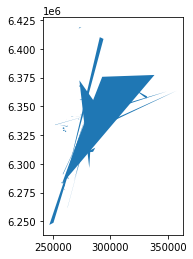

In [26]:
convexh.plot()

In [27]:
hull=pd.concat([inc_mayorarea['nombre_inc'], convexh], axis=1)
hull.columns = ['nombre_inc', 'geometry']

In [28]:
chull=[]
for i in range(len(hull)):
  chull.append(hull.iloc[i]['geometry'].area)

In [29]:
hull['area']=chull

Buscamos las áreas más grandes.

In [30]:
max(hull['area'])

2115035155.0

In [31]:
MAX1=hull[hull['area']==2115035155.0]
MAX1

,nombre_inc,geometry,area
116,CERRO LA VIRGEN,"POLYGON ((257695.000 6282368.000, 279931.000 6...",2.115035e+09


In [32]:
hull=hull.drop([116])

In [33]:
max(hull['area'])

384898294.5

In [34]:
MAX2=hull[hull['area']==384898294.5]
MAX2

,nombre_inc,geometry,area
481,LOS MAITENES,"POLYGON ((281568.000 6296416.000, 272987.000 6...",384898294.5


In [35]:
hull=hull.drop(481)

In [36]:
max(hull['area'])

193273860.0

In [37]:
MAX3=hull[hull['area']==193273860.0]
MAX3

,nombre_inc,geometry,area
702,VALLE HERMOSO,"POLYGON ((265048.000 6300991.000, 290741.000 6...",193273860.0


In [38]:
hull=hull.drop(702)

In [39]:
print(MAX1)
print(MAX2)
print(MAX3)

          nombre_inc                                           geometry  \
116  CERRO LA VIRGEN  POLYGON ((257695.000 6282368.000, 279931.000 6...   

             area  
116  2.115035e+09  
       nombre_inc                                           geometry  \
481  LOS MAITENES  POLYGON ((281568.000 6296416.000, 272987.000 6...   

            area  
481  384898294.5  
        nombre_inc                                           geometry  \
702  VALLE HERMOSO  POLYGON ((265048.000 6300991.000, 290741.000 6...   

            area  
702  193273860.0  


<AxesSubplot:>

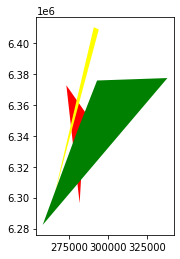

In [40]:
maximos=pd.concat([inc_mayorarea[inc_mayorarea['nombre_inc']=='LOS MAITENES'],inc_mayorarea[inc_mayorarea['nombre_inc']=='VALLE HERMOSO'], inc_mayorarea[inc_mayorarea['nombre_inc']=='CERRO LA VIRGEN']], axis=0)
maximos.convex_hull.plot(color=['red','yellow','green'])

In [41]:
comunas = comunas.to_crs(32719)
comunas.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

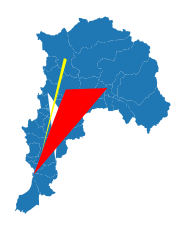

In [42]:
#import matplotlib.pyplot as plt

#lineas_metro_utm.plot(ax = ax, color = 'red', linewidth = 2)
#inc_mayorarea[inc_mayorarea['nombre_inc']=='VALLE HERMOSO'].convex_hull.plot(ax=ax,color='red')
ax=comunas.plot()
maximos.convex_hull.plot(ax=ax, color=['white','yellow','red'])
plt.axis('off')
plt.show()

DESAFÍO 2

In [ ]:
kk1

In [87]:
Prov_valpo=comunas[comunas['Provincia']=='Valparaíso']
Prov_valpo

,objectid,dis_elec,cod_comuna,codregion,Region,Comuna,Provincia,geometry
16,195,7,5102,5,Región de Valparaíso,Casablanca,Valparaíso,"MULTIPOLYGON (((247984.390 6323936.850, 247984..."
17,201,7,5101,5,Región de Valparaíso,Valparaíso,Valparaíso,"POLYGON ((258193.217 6342366.216, 258196.416 6..."
18,203,7,5109,5,Región de Valparaíso,Viña del Mar,Valparaíso,"POLYGON ((261698.593 6351583.480, 261692.051 6..."
19,196,7,5103,5,Región de Valparaíso,Concón,Valparaíso,"POLYGON ((265488.891 6355261.624, 265488.891 6..."
20,200,6,5107,5,Región de Valparaíso,Quintero,Valparaíso,"MULTIPOLYGON (((263995.129 6358265.868, 263982..."
21,23471,6,5105,5,Región de Valparaíso,Puchuncaví,Valparaíso,"MULTIPOLYGON (((266621.843 6378302.119, 266611..."


<AxesSubplot:>

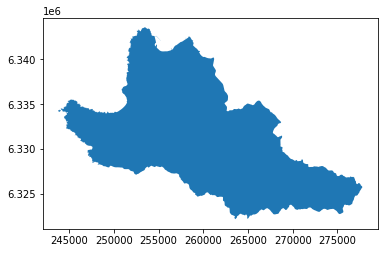

In [89]:
comunas[comunas['Comuna']=='Valparaíso'].plot()

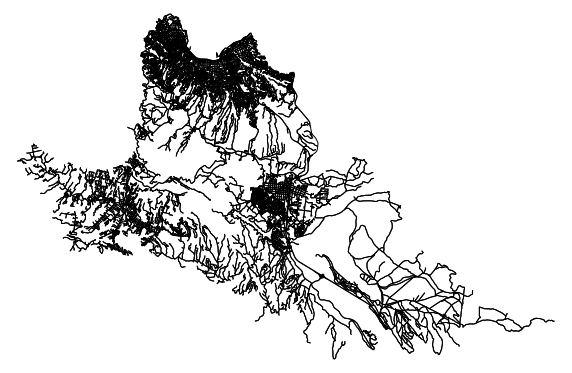

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [92]:
ox.plot_graph(ox.graph_from_place('Valparaiso, Chile'), figsize = (10,10), bgcolor = 'w', node_color = 'red', edge_color = 'black', node_alpha = 0)

DESAFÍO 1

Focos por comunas:

In [167]:
por_comuna=Valpo2.dissolve(by='codcom',aggfunc='count')

<AxesSubplot:>

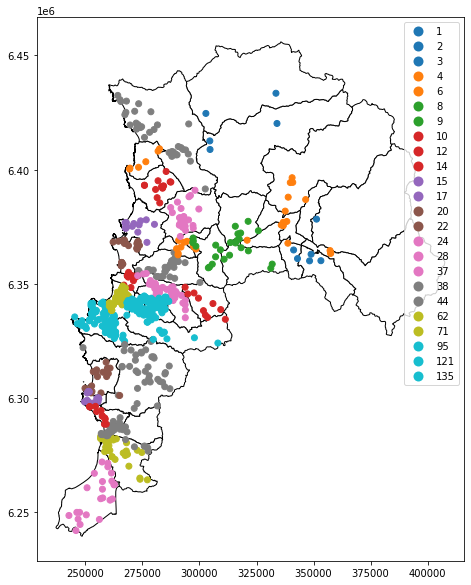

In [196]:
ax=comunas.plot(figsize=(10,10),color='white',edgecolor='black')
por_comuna.plot(ax=ax, figsize=(10,10), column='temporada', legend=True, categorical= True)

Y ahora por provincias:

<AxesSubplot:>

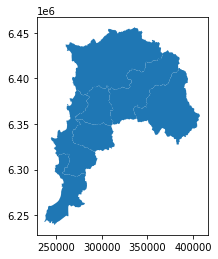

In [202]:
por_provincia=comunas.dissolve(by='Provincia')
por_provincia.plot()

In [ ]:
por_provincias_hull=comunas.dissolve(by='Provincia').convex_hull.plot(alpha=0.5)
por_provincias_hull


<AxesSubplot:>

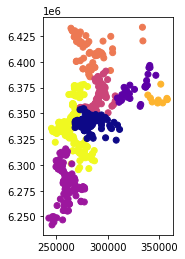

In [189]:
Valpo.dissolve(by='codprov',aggfunc='count').plot(cmap='plasma_r')

<AxesSubplot:>

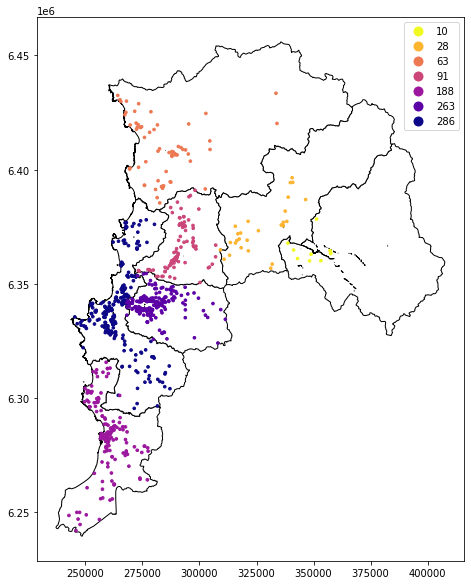

In [214]:
ax=comunas.dissolve(by='Provincia').plot(figsize=(10,10),color='white',edgecolor='black')
Valpo.dissolve(by='codprov',aggfunc='count').plot(markersize=7, ax=ax, cmap='plasma_r', figsize=(10,10), column='temporada', legend=True, categorical= True)

Así entonces podemos aprecir que la provincia con mayor prob. de incendios es la de Valparaíso son un 30.8%